In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Hitesh khatana\Downloads\WHO.csv")

In [3]:
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2


# Treating missing values and outliers

In [23]:
data[data == 0].count()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                     0
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers               0
LiteracyRate                     91
GNI                               0
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

In [5]:
l1 = list(data[data["FertilityRate"] == 0].index)
data["FertilityRate"][l1] = data["FertilityRate"].mean()

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
l1 = list(data[data["CellularSubscribers"] == 0].index)
data["CellularSubscribers"][l1] = data["CellularSubscribers"].mean()

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
l1 = list(data[data["GNI"] == 0].index)
data["GNI"][l1] = data["GNI"].mean()

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
X = data.drop(["LifeExpectancy"],axis = 1)

In [9]:
Y = data["LifeExpectancy"]

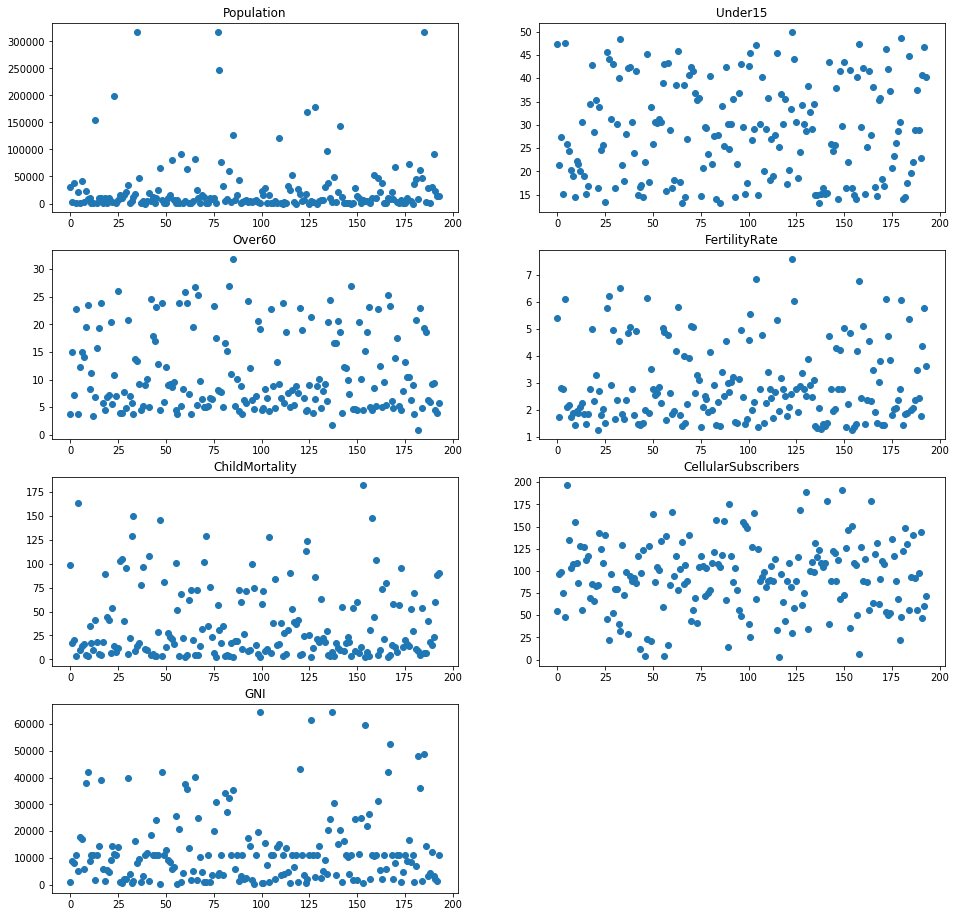

In [22]:
plt.figure(1,figsize = [16,16])
plt.subplot(421)
plt.scatter(X["Population"].index,X["Population"])
plt.title("Population")
plt.subplot(422)
plt.scatter(X["Under15"].index,X["Under15"])
plt.title("Under15")
plt.subplot(423)
plt.scatter(X["Over60"].index,X["Over60"])
plt.title("Over60")
plt.subplot(424)
plt.scatter(X["FertilityRate"].index,X["FertilityRate"])
plt.title("FertilityRate")
plt.subplot(425)
plt.scatter(X["ChildMortality"].index,X["ChildMortality"])
plt.title("ChildMortality")
plt.subplot(426)
plt.scatter(X["CellularSubscribers"].index,X["CellularSubscribers"])
plt.title("CellularSubscribers")
plt.subplot(427)
plt.scatter(X["GNI"].index,X["GNI"])
plt.title("GNI")
plt.show()

In [15]:
l1 = sorted(X["Population"].values)[-2:]

In [18]:
for i in l1:
    l2 = X["Population"][X["Population"] == i].index
    X["Population"][l2] = sorted(X["Population"].values)[-3]

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
l1 = sorted(X["GNI"].values)[-1]

In [21]:
l2 = X["GNI"][X["GNI"] == l1].index
X["GNI"][l2] = sorted(X["GNI"].values)[-2]

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Label encoding and standardization of data

In [134]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in X.columns:
    if isinstance(X[i][0],str):
        X[i] = encoder.fit_transform(X[i])

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_d = scaler.transform(X)

C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hitesh khatana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Feature selection

In [136]:
correlation = pd.Series([np.corrcoef(X[i],Y)[0,1] for i in list(X.columns)],index=list(X.columns))
correlation

Region                 0.491082
Population             0.023655
Under15               -0.836467
Over60                 0.688129
FertilityRate         -0.824463
ChildMortality        -0.924564
CellularSubscribers    0.610808
GNI                    0.618488
dtype: float64

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)    

const                            134.647120
Country                            1.095872
Region                             1.540173
Population                         1.060824
Under15                           16.976184
Over60                             4.147127
FertilityRate                     11.517273
ChildMortality                     4.793201
CellularSubscribers                1.935928
LiteracyRate                       1.131799
GNI                                2.075176
PrimarySchoolEnrollmentMale      264.341905
PrimarySchoolEnrollmentFemale    268.082747
dtype: float64

In [38]:
droplist = ["PrimarySchoolEnrollmentMale","PrimarySchoolEnrollmentFemale","LiteracyRate","Country","const"]

In [39]:
X = X.drop(droplist,axis = 1)

In [41]:
X.head()

,Region,Population,Under15,Over60,FertilityRate,ChildMortality,CellularSubscribers,GNI
0,2,29825,47.42,3.82,5.400000,98.5,54.26,1140.000000
1,3,3162,21.33,14.93,1.750000,16.7,96.39,8820.000000
2,0,38482,27.42,7.17,2.830000,20.0,98.99,8310.000000
3,3,78,15.20,22.86,2.773918,3.2,75.49,11123.659794
4,0,20821,47.58,3.84,6.100000,163.5,48.38,5230.000000


# Modeling

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  

lin = LinearRegression() 
lin.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

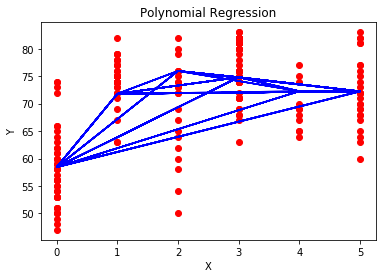

In [100]:

plt.scatter(X["Region"].values.reshape(-1,1), Y, color = "red") 
plt.plot(X["Region"].values.reshape(-1,1), lin.predict(poly.fit_transform(X["Region"].values.reshape(-1,1))), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X') 
plt.ylabel('Y') 
  
plt.show() 

In [117]:
a = np.array(data)
pred = lin.predict(poly.fit_transform(X))

In [133]:
from sklearn.metrics import r2_score
r2_score(pred,b)

0.9725053490447918